In [72]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('credit_card_fraud_dataset.csv')

In [61]:
df.shape

(100000, 7)

In [62]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

In [63]:
df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

In [64]:
df = df.drop('TransactionDate', axis=1)

In [65]:
df.isnull().sum()

TransactionID      0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [66]:
df.dtypes

TransactionID        int64
Amount             float64
MerchantID           int64
TransactionType     object
Location            object
IsFraud              int64
dtype: object

In [67]:
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

# Detect and encode categorical variables
X = pd.get_dummies(df.drop(columns=['IsFraud']), columns=['TransactionType', 'Location'], drop_first=True)

In [55]:
print(X.dtypes)

TransactionID               int64
Amount                    float64
MerchantID                  int64
TransactionType_refund       bool
Location_Dallas              bool
Location_Houston             bool
Location_Los Angeles         bool
Location_New York            bool
Location_Philadelphia        bool
Location_Phoenix             bool
Location_San Antonio         bool
Location_San Diego           bool
Location_San Jose            bool
dtype: object


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔍 Training vs Testing Evaluation Metrics
               Training       Testing
Accuracy       0.608243      0.605000
Precision      0.010514      0.010344
Recall         0.410000      0.406667
F1 Score       0.020502      0.020175
TP           287.000000    122.000000
FP         27010.000000  11672.000000
FN           413.000000    178.000000
TN         42290.000000  18028.000000


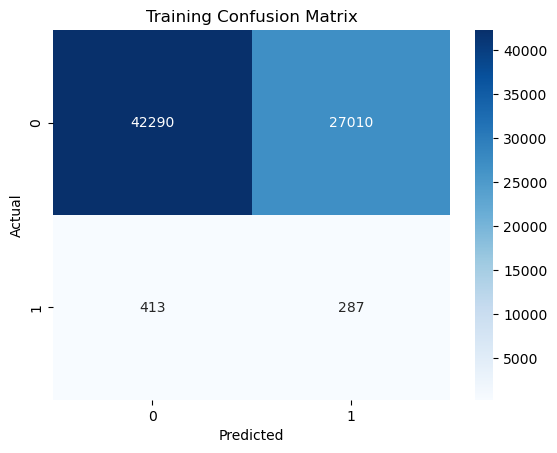

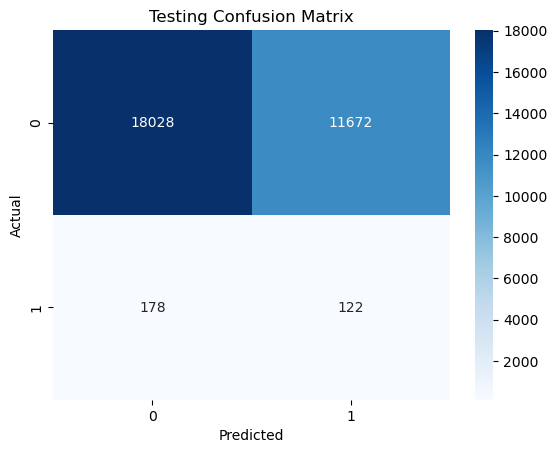

In [108]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.4, random_state=42)
iso_forest.fit(X_train_scaled)
preds = iso_forest.fit_predict(X_scaled)
predicted = [1 if x == -1 else 0 for x in preds]


train_preds = [1 if x == -1 else 0 for x in iso_forest.predict(X_train_scaled)]
test_preds = [1 if x == -1 else 0 for x in iso_forest.predict(X_test_scaled)]

def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    }
train_metrics = compute_metrics(y_train, train_preds)
test_metrics = compute_metrics(y_test, test_preds)

comparison_df = pd.DataFrame({
    'Training': train_metrics,
    'Testing': test_metrics
})

print("\n🔍 Training vs Testing Evaluation Metrics")
print(comparison_df)

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_train, train_preds, "Training Confusion Matrix")
plot_confusion(y_test, test_preds, "Testing Confusion Matrix")

In [114]:
combined_df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

In [110]:
combined_df.to_csv('final.csv')

In [111]:
combined_df = X.copy()
combined_df['IsFraud'] = y
combined_df['Predicted'] = predicted

In [112]:
print(combined_df['IsFraud'].value_counts())
print(combined_df['Predicted'].value_counts())

IsFraud
0    99000
1     1000
Name: count, dtype: int64
Predicted
0    60000
1    40000
Name: count, dtype: int64
